## Clustering
- hard 클러스터링: 특정 개체가 집단에 포함되는지 여부를 클러스터에 속한다(1), 속하지않는다(0)로 표현
    - K-Means 클러스터링
    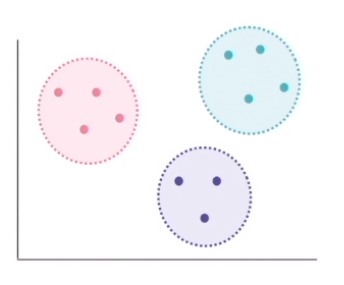
- soft 클러스터링: 특정 개체가 집단에 얼마나 포함되는지 정도를 클러스터에 속하는 정도로 표현
    - GMM(Gausian Mixture Model 알고리즘
    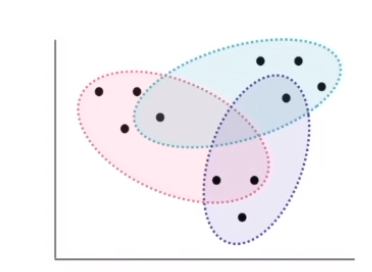
- 클러스터링 목표
    - 군집간 유사성 최소화
    - 군집내 유사성 최대화

## K-Means Clustering
K-Means 클러스터링은 가장 간단하고 널리 사용되는 클러스터링 알고리즘 이다.
K-Means 클러스터링은 데이터의 영역을 대표하는 Cluster-center(중심점)을 찾아가며 데이터를 클러스터에 할당한다.
자신(해당 클러스터)에 할당된 데이터들의 중심을 계산하고, 계산된 중심을 새로운 중심으로 설정하는 과정을 반복하는 EM 알고리즘을 기반으로 수행한다.

- 제공된 데이터를 k개로 군집화하는 알고리즘
- 군집화할 개수 k는 하이퍼파라미터
- 군집화 과정
    1. 데이터셋 중 k개를 랜덤하게 뽑아 해당 데이터를 중심으로 함
    2. 모든 데이터에 대하여 각 클러스터의 중심과 자신(해당 데이터)을 비교하고 가장 가까운 클러스터를 저장함
    3. 자신에 할당된 데이터들의 중심을 계산하여 새로운 중심 설정
    4. 설정된 중심이 변화가 없을 때까지 2, 3번 과정 반복
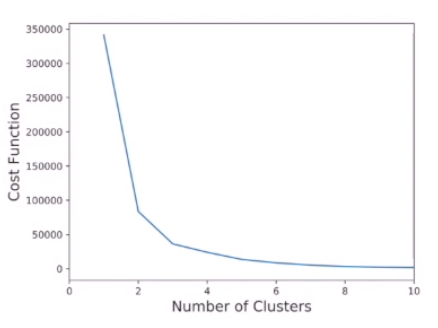
- 다양한 k값을 시도해보고 클러스터 수를 증가시켜도 별 효과없는 지점의 k선택

특징
- 랜덤 초기값 설정으로 데이터의 분포가 특이한 경우 원하는 값이 나오지 않을 수 있음
- 시간복잡도가 가벼워 많은 계산량이 필요한 대용량 데이터에 적합
- 실제 문제에 적용할 때는 여러번 클러스터링을 수행해 가장 빈번히 등장하는 군집에 할당
K-Means 클러스터링을 위한 사이킷런 함수/라이브러리
```python
from sklearn.cluster import KMeans: K-Means 클러스터링을 위한 모델을 불러옵니다.
KMeans(init, n_clusters, random_state) : K-Means 클러스터링 모델을 정의합니다.
init : 중심점 초기화 방법 설정(‘random’ 으로 설정할 경우 랜덤으로 중심점을 초기화함)
n_clusters : 군집의 개수, 즉 군집 중심점의 개수
random_state : 일관된 결과 확인을 위한 설정값
[Model].fit(data) : data에 대한 클러스터링을 수행합니다.
[Model].labels_ : 각 데이터가 속한 군집 중심점 label(클러스터링 결과)를 반환합니다.
```

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target
    
    return irisDF
    
"""
1. K-means 클러스터링을 
   수행하는 함수를 구현합니다.
   
   Step01. K-Means 객체를 불러옵니다.
           
           군집의 개수는 3, 
           중심점 초기화는 랜덤,
           random_state = 100으로 설정합니다.
           
   Step02. K-means 클러스터링을 수행합니다.
           
           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 target 변수를 제거한
           데이터를 학습시켜줍니다.
           
   Step03. 군집화 결과 즉, 각 데이터가 속한 군집
           중심점들의 label을 
           iris 데이터 프레임에 추가합니다.
"""
def k_means_clus(irisDF):
    
    kmeans = KMeans(init='random', n_clusters= 3,random_state=100)
    
    kmeans.fit(irisDF)
    
    irisDF['cluster'] = kmeans.labels_
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('K-menas')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")


def main():
    
    irisDF = load_data()
    
    iris_result, irisDF = k_means_clus(irisDF)
    
    Visualize(irisDF)
    
if __name__ == "__main__":
    main()


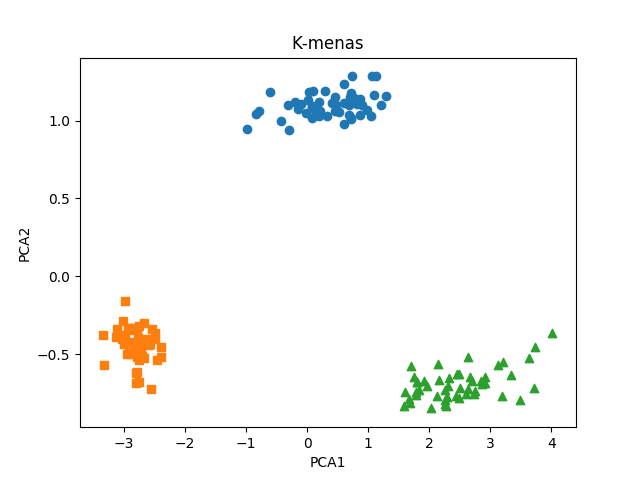

## GMM(Gaussian Mixture Model)
전체 데이터의 확률분포가 여러개의 정규분포(Normal Distribution)의 조합으로 이루어져 있다고 가정하고 각 분포에 속할 확률이 높은 데이터끼리 클러스터링하는 방법
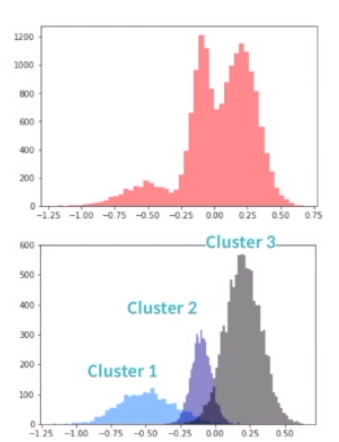
- 학습데이터의 분포와 유사한 k개의 정규분포를 추출
- 개별 데이터가 어떤 정규 분포에 속하는지 결정
- GMM 진행과정
    1. 각 클러스터 마다 해당 클러스터가 선택될 확률(데이터가 어떤 클래스에 속하는지), 평균, 분산(클러스터의 형태)을 랜덤하게 초기화
    2. 변화가 없을 때까지 모든 데이터에 대해서 아래 과정 반복
        - 클러스터가 선택될 확률, 평균, 분산이 주어짐
        - 각 데이터가 어느 클러스터에 들어가는지 계산
    3. 변화가 없을 때까지 모든 클러스터에 대해서 아래 과정 반복
        - 각 데이터가 어느 클러스터에 들어가는지 주어짐
        - 클러스터가 선택될 확률, 평균, 분산 계산
        
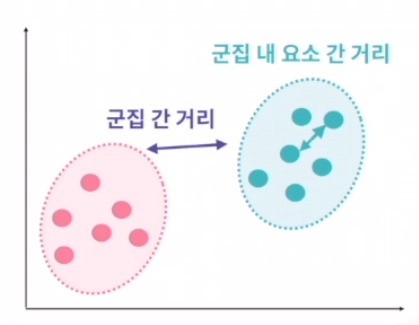
- Dunn Index
    - 분자값이 클수록 군집간의 거리가 크고 분모값이 작을 수록 군집내의 데이터들이 모여있다는 뜻
    - 해당 지표는 클수록 높은 성능을 의미
    
    $군집간 거리의 최소값 / 군집내 요소간의 거리의 최댓값$

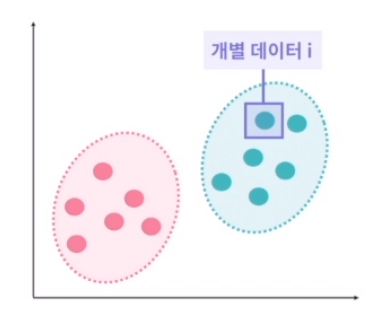
- 실루엣(Silhouette) 지표
    - 얼마나 잘 군집화되었는지에 대한 정량적 평가
    - 클러스터의 밀집 정도 계산
    - -1부터 1사이의 값을 가짐, 1에 가까울수록 높은 성능

특징
- 전체 데이터의 확률분포가 여러 개의 정규분포 조합으로 이루어져 있다고 가정하고 실행시키는 모델입니다.
- 계산량이 많아 대량의 데이터에 적용하기 적합하지 않습니다.
- 데이터 분포의 형태가 원형이 아니여도 좋은 성능을 보입니다.
- Cluster Center 좌표는 존재하지 않습니다.

GMM을 위한 사이킷런 함수/라이브러리
```python
from sklearn.mixture import GaussianMixture : 사이킷런에 구현되어 있는 GMM 모델을 불러옵니다.
GaussianMixture(n_components, random_state)
n_components : 군집의 개수
random_state : 일관된 결과 확인을 위한 설정값
[Model].fit(data) : data에 대한 클러스터링 학습을 수행합니다.
[Model].predict(data) : data에 대한 클러스터링 예측을 수행하여 클러스터링 결과를 반환합니다.
```

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target
    
    return irisDF
    
"""
1. GMM 클러스터링을 
   수행하는 함수를 구현합니다.
   
   Step01. GMM 객체를 불러옵니다.
           
           군집의 개수는 3,
           일관된 결과 확인을 위해 
           random_state를 100으로 설정합니다.
           
   Step02. GMM 클러스터링을 수행합니다.
           
           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 target 변수를 제거한
           데이터를 학습시켜줍니다.
           
   Step03. 군집화 결과를 
           iris 데이터 프레임에 추가합니다.
           
"""
def gmm_clus(irisDF):
    
    gmm = GaussianMixture(n_components=3, random_state=100)
    
    gmm.fit(irisDF.drop('target',axis=1))
    
    irisDF['cluster'] = gmm.predict(irisDF.drop('target',axis=1))
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")


def main():
    
    irisDF = load_data()
    
    iris_result, irisDF = gmm_clus(irisDF)
    
    Visualize(irisDF)
    
    
if __name__ == "__main__":
    main()


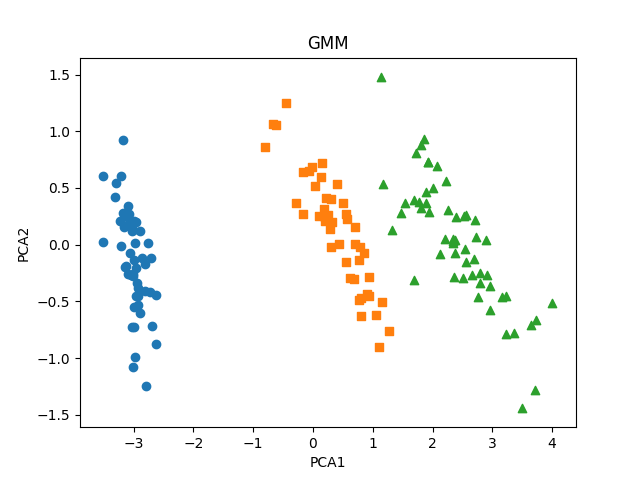

## K-Means VS GMM
K-Means 클러스터링은 군집화 범위가 원형입니다. 그러므로 데이터 세트의 분포가 원형에 가까울수록 효율이 높아집니다.

그러나 실제 데이터의 분포가 원형인 경우는 적습니다. 데이터의 분포가 만약 타원의 형태로 길쭉하게 늘어져 있다면 K-means 클러스터링은 해당 데이터에 대하여 제대로 군집화를 진행하기 어렵습니다.

이런 경우에는 데이터의 분포 방향에 따라 군집화를 진행하는 GMM 클러스터링을 사용하면 군집화 성능을 높일 수 있습니다.

타원형 분포 데이터 생성을 위한 사이킷런 함수/라이브러리

```python
make_blobs(n_samples, n_features, centers, cluster_std, random_state)
n_samples : 생성할 데이터의 총 개수
n_features : 데이터의 변수 개수, 시각화를 위해 보통 2개로 설정
centers : 군집의 개수
cluster_std : 데이터의 표준편차
random_state : 일관된 결과를 위한 설정값
```

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

from elice_utils import EliceUtils
elice_utils = EliceUtils()

"""
1. 지시 사항과 동일한 타원형 분포의 데이터를
   생성합니다.
   
   Step01. 타원형 분포의 데이터를 생성합니다.
           
           데이터의 개수는 300개,
           데이터 변수의 개수는 2개,
           군집의 개수는 3개,
           데이터의 표준편차는 0.8,
           random_state 는 0으로 설정합니다.
"""
# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)


# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    
"""
2. K-Means 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 K-Means 
           클러스터링을 수행합니다.
           
           초기화 방식은 랜덤,
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
    Step02. kmeans_label 변수에
            클러스터링 결과를 저장합니다.
"""
def K_means():
    
    k_means = KMeans(init='random', n_clusters= 3,random_state=0)
    
    k_means.fit(X_aniso)
    
    kmeans_label = k_means.labels_
    
    clusterDF['kmeans_label']=kmeans_label
    
    # Kmeans 군집의 중심값을 뽑아 저장합니다.
    center = k_means.cluster_centers_
    
    # KMeans 군집 결과를 시각화합니다.
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    
    return kmeans_label
    
"""
3. GMM 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 
           GMM 클러스터링을 수행합니다.
           
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
   Step02. gmm_label 변수에
           클러스터링 결과를 저장합니다.
            
"""
def GMM():
    
    gmm = GaussianMixture(n_components=3, random_state=0)

    gmm_label = gmm.fit_predict(X_aniso)
    
    clusterDF['gmm_label']=gmm_label
    
    unique_labels = np.unique(gmm_label)
    
    # GMM 군집 결과를 시각화합니다.
    fig, ax = plt.subplots()
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    
    return gmm_label

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()


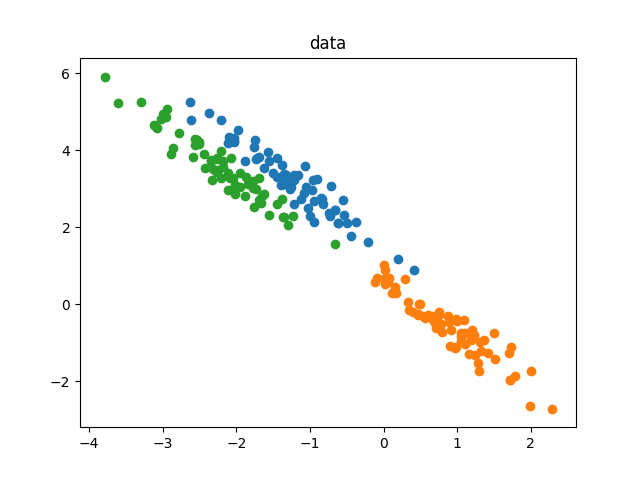
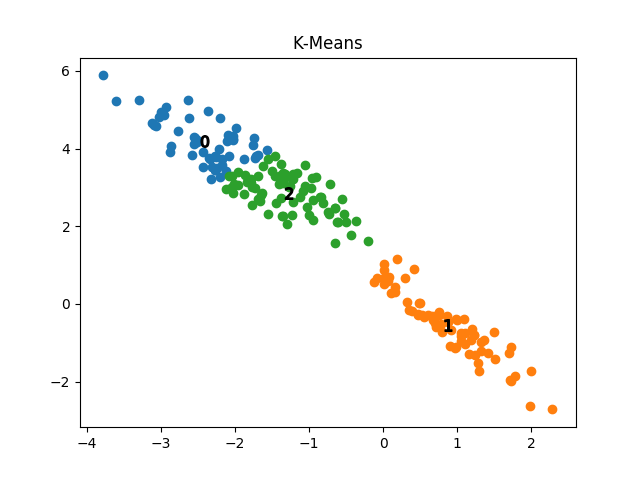
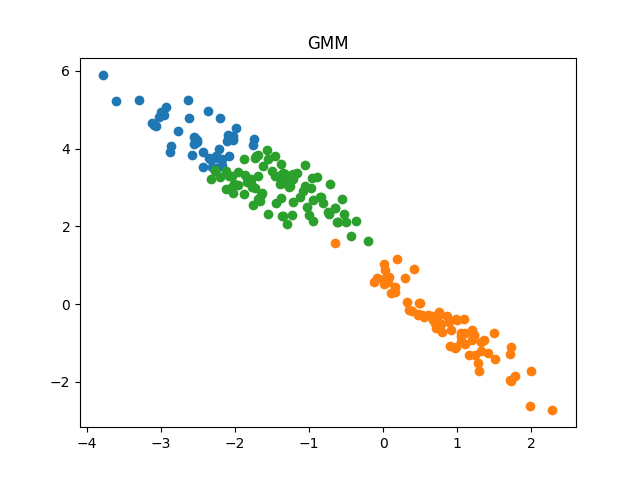